In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import IsolationForest

In [3]:
df = pd.read_csv('../../../data/miner/df_qtde_ref.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df[]
df.head()

,valor_unit,mes,dia_semana,dia,fim_semana,inicio_mes,feriado,quantidade
0,2.49,1,2,2,0,1,0,240.0
1,2.35,1,3,3,0,1,0,331.0
2,2.29,1,4,4,0,1,0,310.0
3,2.29,1,5,5,1,1,0,228.0
4,2.29,1,6,6,1,1,0,127.0


In [20]:
plt.rcParams['figure.figsize'] = [12.0 , 8.0]
plt.rcParams['figure.dpi'] = 80
plt.rcParams['savefig.dpi'] = 100

plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 'large'
plt.rcParams['figure.titlesize'] = 'medium'

In [19]:
y = df['quantidade']
x = df.index

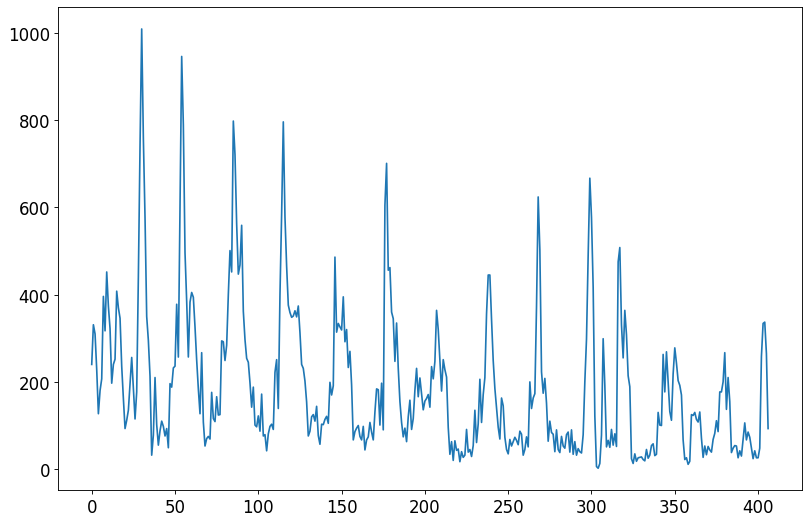

In [22]:
plt.plot(x,y)

In [27]:
data = df[['valor_unit','quantidade']]
scaler = StandardScaler()
np_scaled = scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)

In [28]:
data.head()

,0,1
0,0.398355,0.300796
1,-0.570829,0.849134
2,-0.986193,0.722595
3,-0.986193,0.228488
4,-0.986193,-0.380107


In [84]:
# train isolation forest
model =  IsolationForest(n_estimators=1 ,contamination=0.1)
model.fit(df) 
df['anomaly2'] = pd.Series(model.predict(df))

In [85]:
a = df.loc[df['anomaly2'] == -1, ['quantidade']] #anomaly

In [86]:
len(a)

40

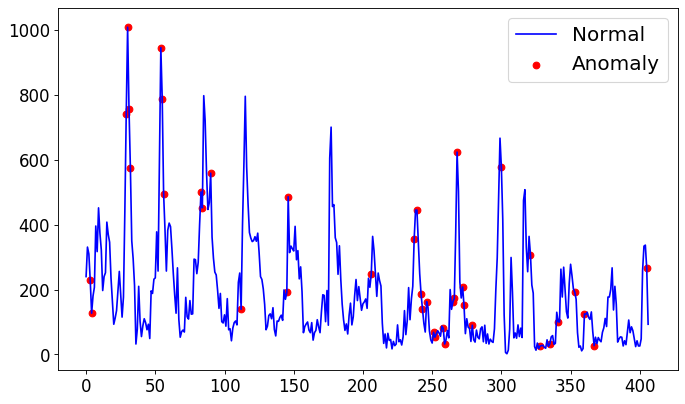

In [87]:
# visualization
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(df.index, df['quantidade'], color='blue', label = 'Normal')
ax.scatter(a.index,a['quantidade'], color='red', label = 'Anomaly')
plt.legend()
plt.show();

In [46]:
df.head()

,valor_unit,mes,dia_semana,dia,fim_semana,inicio_mes,feriado,quantidade,index,anomaly2
0,2.49,1,2,2,0,1,0,240.0,0,1
1,2.35,1,3,3,0,1,0,331.0,1,1
2,2.29,1,4,4,0,1,0,310.0,2,1
3,2.29,1,5,5,1,1,0,228.0,3,1
4,2.29,1,6,6,1,1,0,127.0,4,-1
